В encoding.hpp реализация функций

в test.cpp проверка, что decode(encode(x)) == x

в experiment.cpp вычисление степени сжания при разных p, где p - параметр геометрического распределения.  Число семплов для каждого p равно 100000, степень сжатия - количество сгенерированных uint64_t чисел умноженное на 8 и разделенное на количество char'ов, полученных после encode.

Построим график зависимости степени сжатия от p

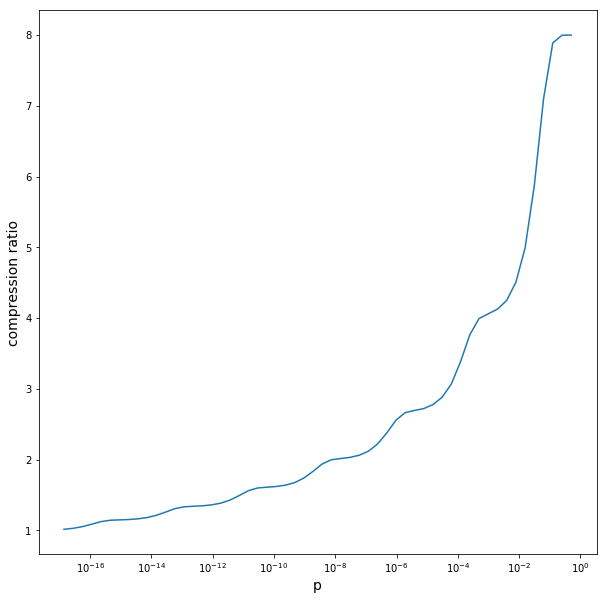

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('probs.txt', sep=' ', header=None).values
plt.figure(figsize=(10, 10))
plt.plot(data[:, 0], data[:, 1])
plt.ylabel('compression ratio', fontsize=14)
plt.xlabel('p', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
plt.show()

При p близких к 1 почти все числа кодируются 1 байтом и степерь сжатия в райное 8. По мере уменьшения p генерим все большие числа, нам требуется все большее число байт, и степень сжатия падает, пока не доходит до 1.

Интересно, что график имеет ступенчатый вид. Происходит это из-за того, что степень сжатия одинаковая для чисел от $2^{max(0, 8i - 3)}$ до $2^{8(i + 1) - 3} - 1$. Если при очередном увеличении p основная масса сгенерированных чисел перемещается внутри одного такого промежутка, степень сжатия изменяется слабо. Когда многие числа начинают переходить границу промежутка мы видим более резкое падение на графике